<a href="https://colab.research.google.com/github/Rodrigo-Szyszka-Baptista/MVP-Analise-de-Dados/blob/main/MVP_An%C3%A1lise_de_dados_Rodrigo_Szyszka_Baptista.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MVP Análise de Dados - Análise de preço de combustível para auxiliar decisão de localidade de nova distribuidora

In [5]:
# Análise da Estabilidade dos Preços de Combusítvel no Brasil (2014–2024)

## Objetivo Geral

#Analisar a estabilidade e a competitividade do preço do diesel nos estados brasileiros, ao longo da última década (2014–2024), para subsidiar decisões logísticas relacionadas à escolha de rotas, pontos de apoio e operações de transporte de carga.

---

## Objetivos Específicos

#Investigar a variação dos preços médios do diesel por estado ao longo do tempo.
#Medir a estabilidade de preços em cada estado com base na dispersão estatística (desvio padrão e coeficiente de variação).
#Identificar os estados com preços mais baixos e mais consistentes, considerando possíveis oportunidades logísticas.
#Avaliar se há padrões sazonais ou flutuações significativas em anos eleitorais.
#Verificar a qualidade e integridade dos dados, tratando valores faltantes, inconsistências e outliers.

---

## Perguntas de Pesquisa

#Quais estados apresentaram os preços médios de diesel mais baixos entre 2014 e 2024?
#Quais estados tiveram maior estabilidade de preços (menor desvio padrão ou coeficiente de variação)?
#Existe algum padrão de sazonalidade nos preços do diesel ao longo dos meses do ano?
#Os preços do diesel apresentam comportamentos atípicos em anos eleitorais?
#Quais bandeiras mantiveram os preços mais competitivos no longo prazo?

---

#Este estudo busca contribuir com análises que auxiliem na tomada de decisão logística para empresas de transporte, operadores de frota e gestores públicos, com foco no impacto dos preços de combustível na estrutura de custos operacionais.


SyntaxError: invalid syntax (ipython-input-5-3626136749.py, line 8)

In [9]:
#Para garantir que os dados rodem, foi feito o upload dos arquivos. Porém como no Github pode apenas arquivos com menos de 25MB, foi feito o upload no google Drive para rodar automaticamente

# Instalar o gdown
!pip install -q gdown

# Baixar a pasta do Google Drive
!gdown --folder https://drive.google.com/drive/folders/1XPNzo68ST_jH1_ob4S3x6jkANbLtyhyP -O dados_combustivel

# Verificar os arquivos baixados
import os
print("Arquivos baixados:")
print(os.listdir("dados_combustivel"))


Retrieving folder contents
Processing file 1OYfqUzQ4OdifqDcg2JQaRLcLR4AiFaYJ Preços semestrais - AUTOMOTIVOS_2024.02.csv
Processing file 1MW0i0cr3-6qeS-1XfB3UX2hjQk0xhxUU ca-2021-02.csv
Processing file 1PxeleHM3EMK--b5BqXmcKILudjWgjQyg ca-2022-02.csv
Processing file 1CN9NfBzSYEaRnn8wmruX7FDTLdmld1uF Preços semestrais - AUTOMOTIVOS_2023.01.csv
Processing file 1uSpYBMmmD6oDkxkPGAb9CidymESuCb2j Preços semestrais - AUTOMOTIVOS_2023.02.csv
Processing file 1TnUVb9ITSX7z5W7KqH6V3wtPn4Pa_368 Preços semestrais - AUTOMOTIVOS_2024.01.csv
Processing file 1MH6MVjtS9xJJarPFYVOgfr1NqAEL4UL- ca-2020-02.csv
Processing file 1ISItFZsuFdMSbfJI-G4absdQg8UNfoJp precos-semestrais-ca-2022-01.csv
Processing file 1wOmHCqtzdfssXBmgENCK0CwPAHMa_HIo ca-2021-01.csv
Processing file 1hzwv4qrSV4Pe44NwlxKhl5uOF-MYHqtY ca-2018-02.csv
Processing file 16IQbHCeKgGrLdd-v9upIKoeJuwZeW7dm ca-2020-01.csv
Processing file 16EhAOApx6ulMDQ_GjBliexYwG5Xq_cLK ca-2019-02.csv
Processing file 1HBZPJrbAdhNOiMjLn-6EqsjMWUcrQ0-c ca-2019-0

Etapa de Tratamento de dados

In [10]:
import pandas as pd
import os

# Definir o caminho da pasta com os arquivos baixados
caminho_pasta = "dados_combustivel"

# Criar lista para armazenar temporariamente os DataFrames
lista_dfs = []

# Loop sobre os arquivos CSV na pasta
for arquivo in os.listdir(caminho_pasta):
    if arquivo.endswith(".csv"):
        caminho_completo = os.path.join(caminho_pasta, arquivo)

        # 📥 Ler o arquivo CSV
        try:
            df_temp = pd.read_csv(caminho_completo, sep=";", encoding="latin1", low_memory=False)
            df_temp["arquivo_origem"] = arquivo  # 🏷️ Guardar o nome do arquivo de origem
            lista_dfs.append(df_temp)
        except Exception as e:
            print(f"Erro ao ler {arquivo}: {e}")

# Concatenar todos os DataFrames em um único DataFrame
df_combustivel = pd.concat(lista_dfs, ignore_index=True)

# Exibir amostra dos dados
df_combustivel.sample(5)

,ï»¿Regiao - Sigla,Estado - Sigla,Municipio,Revenda,CNPJ da Revenda,Nome da Rua,Numero Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira,arquivo_origem,Regiao - Sigla
8057172,SE,RJ,SAO JOAO DE MERITI,CARMENCITA AUTO POSTO LTDA,29.571.627/0001-84,AVENIDA AUTOMOVEL CLUB,2350,NaN,VILAR DOS TELES,25510-292,ETANOL,13/08/2014,"2,399","1,8999",R$ / litro,BRANCA,ca-2014-02.csv,NaN
7166219,N,RO,JI-PARANA,COMERCIO DE COMBUSTIVEIS RONDOPOSTO LTDA,04.685.448/0001-47,AVENIDA JI-PARANA,1125,NaN,URUPA,76900-293,DIESEL,26/09/2018,"3,99",NaN,R$ / litro,IPIRANGA,ca-2018-02.csv,NaN
1753744,SE,SP,TAUBATE,AUTO POSTO MARECHAL INDEPENDENCIA LTDA,03.102.397/0001-10,AVENIDA DA INDEPENDENCIA,566,NaN,JD. DAS NACOES,12030-000,GASOLINA,19/10/2022,"4,59",NaN,R$ / litro,IPIRANGA,ca-2022-02.csv,NaN
1155825,NE,PI,TERESINA,PLANALTO PETROLEO VERMELHA LTDA,29.778.044/0001-29,AVENIDA PEDRO FREITAS,1765,NaN,VERMELHA,64018-000,ETANOL,09/03/2022,"5,17",NaN,R$ / litro,SABBÃ,precos-semestrais-ca-2022-01.csv,NaN
7702867,SE,SP,JACAREI,POSTO DE SERVICO PORTAL DO VALE LTDA,67.774.174/0001-82,AVENIDA 9 DE JULHO,696,NaN,CENTRO,12315-310,DIESEL S10,19/10/2023,"5,87",NaN,R$ / litro,RAIZEN,Preços semestrais - AUTOMOTIVOS_2023.02.csv,NaN


In [11]:
# Após o carregamento dos dados, já é possível observar que existem colunas irrelevantes para o objetivo da análise
# Neste ponto, opto por já remover essas colunas para manter o dataset mais enxuto e facilitar as próximas etapas

# Lista de todas as colunas disponíveis
print("Colunas disponíveis na base original:")
print(df_combustivel.columns.tolist())

Colunas disponíveis na base original:
['ï»¿Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Revenda', 'CNPJ da Revenda', 'Nome da Rua', 'Numero Rua', 'Complemento', 'Bairro', 'Cep', 'Produto', 'Data da Coleta', 'Valor de Venda', 'Valor de Compra', 'Unidade de Medida', 'Bandeira', 'arquivo_origem', 'Regiao - Sigla']


In [12]:
# A coluna correta é 'ï»¿Regiao - Sigla' — a versão 'Regiao - Sigla' está vazia e será ignorada

# Defino as colunas que realmente serão úteis para análise
colunas_utilizadas = [
    'ï»¿Regiao - Sigla',     # Corrigir para usar o nome real da coluna
    'Estado - Sigla',
    'Municipio',
    'Produto',
    'Valor de Venda',
    'Data da Coleta',
    'Bandeira'
]

# Mantém apenas as colunas relevantes
df_combustivel = df_combustivel[colunas_utilizadas].copy()

# Verifica se a exclusão foi bem-sucedida
print("\nColunas mantidas após a limpeza:")
print(df_combustivel.columns.tolist())

# Verifica se o número de linhas foi preservado
print(f"\nA base ainda possui {df_combustivel.shape[0]:,} linhas | {df_combustivel.shape[1]} colunas")

# Exibir amostra dos dados
df_combustivel.sample(5)


Colunas mantidas após a limpeza:
['ï»¿Regiao - Sigla', 'Estado - Sigla', 'Municipio', 'Produto', 'Valor de Venda', 'Data da Coleta', 'Bandeira']

A base ainda possui 10,272,841 linhas | 7 colunas


,ï»¿Regiao - Sigla,Estado - Sigla,Municipio,Produto,Valor de Venda,Data da Coleta,Bandeira
9931629,SE,MG,DIAMANTINA,DIESEL S10,"2,996",08/04/2015,BRANCA
5534850,S,SC,SAO JOSE,DIESEL S10,"3,188",16/11/2015,PETROBRAS DISTRIBUIDORA S.A.
1751811,SE,MG,BELO HORIZONTE,ETANOL,"3,59",18/10/2022,RAIZEN
9677210,SE,RJ,ITABORAI,GNV,"1,869",26/01/2015,BRANCA
4101110,S,RS,SANTA MARIA,GASOLINA ADITIVADA,"6,1",08/04/2024,VIBRA


In [13]:
# Padronizar os nomes das colunas para facilitar manipulações futuras
df_combustivel.columns = (
    df_combustivel.columns
    .str.strip()                  # Remover espaços no início/fim
    .str.lower()                 # Transformar tudo em minúsculas
    .str.normalize("NFKD")       # Remover acentos (normalização Unicode)
    .str.encode("ascii", errors="ignore")
    .str.decode("utf-8")
    .str.replace(" ", "_")       # Substituir espaços por underline
    .str.replace("-", "_")       # Substituir hífens por underline
)

# Verificar resultado da padronização
print("Nomes das colunas padronizados:")
print(df_combustivel.columns.tolist())


Nomes das colunas padronizados:
['iregiao___sigla', 'estado___sigla', 'municipio', 'produto', 'valor_de_venda', 'data_da_coleta', 'bandeira']


In [14]:
# Corrigir múltiplos underlines consecutivos após a padronização
df_combustivel.columns = df_combustivel.columns.str.replace("_+", "_", regex=True)

# Renomear a coluna 'iregiao_sigla' para 'regiao_sigla'
df_combustivel.rename(columns={"iregiao_sigla": "regiao_sigla"}, inplace=True)

# Verificar nomes finais das colunas
print("Nomes finais das colunas:")
print(df_combustivel.columns.tolist())


Nomes finais das colunas:
['regiao_sigla', 'estado_sigla', 'municipio', 'produto', 'valor_de_venda', 'data_da_coleta', 'bandeira']


In [15]:
#Agora que colunas foram melhoradas, tratar os dados

df_combustivel["data_da_coleta"] = pd.to_datetime(
    df_combustivel["data_da_coleta"], format="%d/%m/%Y", errors="coerce"
)

df_combustivel["valor_de_venda"] = (
    df_combustivel["valor_de_venda"]
    .astype(str)
    .str.replace(",", ".", regex=False)
    .astype(float)
)


colunas_texto = ["regiao_sigla", "estado_sigla", "municipio", "produto", "bandeira"]
for col in colunas_texto:
    df_combustivel[col] = df_combustivel[col].astype(str).str.strip()

# Verificar tipos de dados atualizados
print("Tipos de dados após normalização:")
print(df_combustivel.dtypes)

exemplo = df_combustivel[["data_da_coleta", "valor_de_venda"]].sample(5).copy()
exemplo["data_da_coleta"] = exemplo["data_da_coleta"].dt.strftime("%d/%m/%Y")

print("\nExemplo de datas (formatadas) e valores convertidos:")
display(exemplo)

Tipos de dados após normalização:
regiao_sigla              object
estado_sigla              object
municipio                 object
produto                   object
valor_de_venda           float64
data_da_coleta    datetime64[ns]
bandeira                  object
dtype: object

Exemplo de datas (formatadas) e valores convertidos:


,data_da_coleta,valor_de_venda
6723028,08/07/2020,3.19
5445575,28/09/2015,3.25
7738646,01/11/2023,5.29
4974538,10/09/2024,3.59
1520193,11/07/2022,7.82


In [16]:
# Agora que os dados estão organizados, verificar a integridade

print("Estados:")
print(sorted(df_combustivel["estado_sigla"].unique()))
print()

print("Produtos:")
print(sorted(df_combustivel["produto"].unique()))
print()

anos_unicos = (
    df_combustivel["data_da_coleta"]
    .dt.year
    .dropna()
    .astype(int)
    .unique()
    .tolist()
)

print("Anos únicos:")
print(sorted(anos_unicos))

Estados:
['AC', 'AL', 'AM', 'AP', 'BA', 'CE', 'DF', 'ES', 'GO', 'MA', 'MG', 'MS', 'MT', 'PA', 'PB', 'PE', 'PI', 'PR', 'RJ', 'RN', 'RO', 'RR', 'RS', 'SC', 'SE', 'SP', 'TO']

Produtos:
['DIESEL', 'DIESEL S10', 'ETANO', 'ETANOL', 'GASOLINA', 'GASOLINA ADITIVADA', 'GNV']

Anos únicos:
[2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]


In [17]:
#Agora após verificar que todos os anos estão presentes, e não possui estado ou produto digitado errado (serão as variáveis principais)
# Remover registros com valores ausentes nas colunas principais
colunas_criticas = ["regiao_sigla", "estado_sigla", "valor_de_venda", "data_da_coleta", "bandeira"]
df_combustivel = df_combustivel.dropna(subset=colunas_criticas)

# Filtrar novamente valores irreais de preço (≤ 0)
df_combustivel = df_combustivel[df_combustivel["valor_de_venda"] > 0]

# Verificar resultado
print(f"Base após remoção de nulos e valores irreais: {df_combustivel.shape[0]:,} linhas | {df_combustivel.shape[1]} colunas")
display(df_combustivel.sample(5))


Base após remoção de nulos e valores irreais: 10,272,840 linhas | 7 colunas


,regiao_sigla,estado_sigla,municipio,produto,valor_de_venda,data_da_coleta,bandeira
1129861,CO,GO,CALDAS NOVAS,GASOLINA,6.970,2022-03-01,BRANCA
2458927,SE,SP,ITU,DIESEL,2.999,2017-01-30,IPIRANGA
2984290,N,RO,ARIQUEMES,ETANOL,2.540,2014-02-03,SABBÃ
7691308,SE,SP,GUARUJA,DIESEL S10,5.740,2023-10-11,BRANCA
7579870,S,PR,SANTO ANTONIO DA PLATINA,GASOLINA ADITIVADA,6.390,2023-08-31,VIBRA


In [18]:
#Agora que as datas estão normalizadas, criar colunas derivadas para facilitar análises temporais

# Extrair ano, mês
df_combustivel["ano"] = df_combustivel["data_da_coleta"].dt.year
df_combustivel["mes"] = df_combustivel["data_da_coleta"].dt.month

# Verificar se as novas colunas foram criadas corretamente
print("Novas colunas temporais adicionadas:")
display(df_combustivel[[
    "data_da_coleta", "ano", "mes",
]].sample(5))

Novas colunas temporais adicionadas:


,data_da_coleta,ano,mes
9190892,2016-02-08,2016,2
9860708,2015-03-16,2015,3
8636822,2021-07-11,2021,7
10031419,2015-04-27,2015,4
2912512,2014-01-14,2014,1


Transformação de dados em informações para análises

In [19]:
#Agora que os dados estão tratados, podemos começar com as análises
# No cenário proposto, uma empresa está realizando um estudo para instalação de um centro de distruibição e busca minimizar os gastos de logísticas
# A primeira análise será realizada apenas com preços dos insumos de combustíveis

# Agregar preços por estado, ano e produto
df_agg = (
    df_combustivel
    .groupby(["ano", "estado_sigla", "produto"])["valor_de_venda"]
    .agg(media_preco="mean", desvio_preco="std", total_registros="count")
    .reset_index()
)

# Calcular o coeficiente de variação
df_agg["coef_variacao"] = (df_agg["desvio_preco"] / df_agg["media_preco"]) * 100

# Arredondar para facilitar leitura
df_agg["media_preco"] = df_agg["media_preco"].round(3)
df_agg["desvio_preco"] = df_agg["desvio_preco"].round(3)
df_agg["coef_variacao"] = df_agg["coef_variacao"].round(2)

# Testar se agrupo corretamente
print("Teste de agregação por ano, estado e produto:")
display(df_agg.sample(5))


Teste de agregação por ano, estado e produto:


,ano,estado_sigla,produto,media_preco,desvio_preco,total_registros,coef_variacao
1118,2022,DF,ETANOL,5.014,0.947,2391,18.88
949,2021,BA,DIESEL,4.749,0.557,4200,11.74
951,2021,BA,ETANOL,4.911,0.582,8806,11.86
261,2016,AL,GASOLINA,3.827,0.155,3223,4.05
45,2014,MA,GASOLINA,3.023,0.135,6362,4.46


In [20]:
# Agrupar por estado e produto (média e desvio entre todos os anos)
df_produto_estado = (
    df_agg
    .groupby(["estado_sigla", "produto"])[["media_preco", "desvio_preco"]]
    .mean()
    .reset_index()
)

# Arredondar para facilitar visualização
df_produto_estado["media_preco"] = df_produto_estado["media_preco"].round(3)
df_produto_estado["desvio_preco"] = df_produto_estado["desvio_preco"].round(3)

# Para cada produto, mostrar os 5 estados com menor preço e os 5 mais estáveis (menor desvio)
produtos_unicos = df_produto_estado["produto"].unique()

for produto in produtos_unicos:
    df_filtrado = df_produto_estado[df_produto_estado["produto"] == produto]

    top_5_baratos = df_filtrado.nsmallest(5, "media_preco")
    top_5_estaveis = df_filtrado.nsmallest(5, "desvio_preco")

    print(f"\nProduto: {produto}")
    print("5 estados com menor preço médio:")
    display(top_5_baratos)

    print("5 estados com maior estabilidade de preços (menor desvio padrão):")
    display(top_5_estaveis)





Produto: DIESEL
5 estados com menor preço médio:


,estado_sigla,produto,media_preco,desvio_preco
101,PR,DIESEL,3.934,0.282
149,SP,DIESEL,4.000,0.298
137,SC,DIESEL,4.005,0.280
41,ES,DIESEL,4.013,0.275
131,RS,DIESEL,4.015,0.302


5 estados com maior estabilidade de preços (menor desvio padrão):


,estado_sigla,produto,media_preco,desvio_preco
125,RR,DIESEL,4.371,0.265
95,PI,DIESEL,4.170,0.270
83,PB,DIESEL,4.039,0.273
35,DF,DIESEL,4.157,0.274
41,ES,DIESEL,4.013,0.275



Produto: DIESEL S10
5 estados com menor preço médio:


,estado_sigla,produto,media_preco,desvio_preco
90,PE,DIESEL S10,4.039,0.279
102,PR,DIESEL S10,4.042,0.295
138,SC,DIESEL S10,4.122,0.285
150,SP,DIESEL S10,4.130,0.314
42,ES,DIESEL S10,4.134,0.283


5 estados com maior estabilidade de preços (menor desvio padrão):


,estado_sigla,produto,media_preco,desvio_preco
126,RR,DIESEL S10,4.437,0.262
84,PB,DIESEL S10,4.135,0.277
36,DF,DIESEL S10,4.288,0.278
90,PE,DIESEL S10,4.039,0.279
42,ES,DIESEL S10,4.134,0.283



Produto: ETANOL
5 estados com menor preço médio:


,estado_sigla,produto,media_preco,desvio_preco
151,SP,ETANOL,3.014,0.324
73,MT,ETANOL,3.022,0.326
49,GO,ETANOL,3.253,0.305
103,PR,ETANOL,3.273,0.305
61,MG,ETANOL,3.304,0.317


5 estados com maior estabilidade de preços (menor desvio padrão):


,estado_sigla,produto,media_preco,desvio_preco
127,RR,ETANOL,4.078,0.230
19,AP,ETANOL,4.177,0.260
31,CE,ETANOL,3.891,0.277
157,TO,ETANOL,3.808,0.289
97,PI,ETANOL,3.696,0.290



Produto: GASOLINA
5 estados com menor preço médio:


,estado_sigla,produto,media_preco,desvio_preco
20,AP,GASOLINA,4.282,0.306
152,SP,GASOLINA,4.403,0.342
86,PB,GASOLINA,4.472,0.320
140,SC,GASOLINA,4.487,0.310
56,MA,GASOLINA,4.520,0.368


5 estados com maior estabilidade de preços (menor desvio padrão):


,estado_sigla,produto,media_preco,desvio_preco
128,RR,GASOLINA,4.595,0.267
20,AP,GASOLINA,4.282,0.306
140,SC,GASOLINA,4.487,0.310
116,RN,GASOLINA,4.746,0.316
86,PB,GASOLINA,4.472,0.320



Produto: GASOLINA ADITIVADA
5 estados com menor preço médio:


,estado_sigla,produto,media_preco,desvio_preco
21,AP,GASOLINA ADITIVADA,5.392,0.438
153,SP,GASOLINA ADITIVADA,5.613,0.550
57,MA,GASOLINA ADITIVADA,5.655,0.521
87,PB,GASOLINA ADITIVADA,5.663,0.456
141,SC,GASOLINA ADITIVADA,5.688,0.441


5 estados com maior estabilidade de preços (menor desvio padrão):


,estado_sigla,produto,media_preco,desvio_preco
129,RR,GASOLINA ADITIVADA,5.722,0.397
21,AP,GASOLINA ADITIVADA,5.392,0.438
141,SC,GASOLINA ADITIVADA,5.688,0.441
75,MT,GASOLINA ADITIVADA,5.764,0.447
87,PB,GASOLINA ADITIVADA,5.663,0.456



Produto: GNV
5 estados com menor preço médio:


,estado_sigla,produto,media_preco,desvio_preco
76,MT,GNV,2.866,0.179
22,AP,GNV,2.899,0.453
94,PE,GNV,2.932,0.213
52,GO,GNV,3.010,0.289
28,BA,GNV,3.090,0.251


5 estados com maior estabilidade de preços (menor desvio padrão):


,estado_sigla,produto,media_preco,desvio_preco
160,TO,GNV,3.257,0.000
100,PI,GNV,3.402,0.046
58,MA,GNV,4.050,0.096
82,PA,GNV,4.100,0.154
16,AM,GNV,3.348,0.159


In [21]:
#Agora já foi possível analisar os estados mais baratos para cada combustível, junto do desvio padrão, que mostra a variação desse preço
#Seguindo para o próximo passo, já sendo possível ver os estados em que são mais baratos, buscar quais bandeiras mais baratas nesses estados, para buscar fazer contratos

#  Criar dicionário com os top 5 estados mais baratos por produto
top_5_estados_por_produto = {}

for produto in produtos_unicos:
    df_filtrado = df_produto_estado[df_produto_estado["produto"] == produto]
    top_5_baratos = df_filtrado.nsmallest(5, "media_preco")
    top_5_estados_por_produto[produto] = top_5_baratos["estado_sigla"].tolist()

# Filtrar df_combustivel para apenas os estados-produto de interesse
filtros = pd.DataFrame([
    {"produto": produto, "estado_sigla": estado}
    for produto, estados in top_5_estados_por_produto.items()
    for estado in estados
])

df_filtrado_bandeiras = df_combustivel.merge(filtros, on=["produto", "estado_sigla"])

# Agrupar por estado, produto e bandeira → média de preço
df_bandeiras = (
    df_filtrado_bandeiras
    .groupby(["estado_sigla", "produto", "bandeira"])["valor_de_venda"]
    .mean()
    .reset_index()
    .rename(columns={"valor_de_venda": "preco_medio"})
)

df_bandeiras["preco_medio"] = df_bandeiras["preco_medio"].round(3)

# Exibir 5 bandeiras mais baratas por produto e estado
for produto in produtos_unicos:
    estados = top_5_estados_por_produto[produto]
    for estado in estados:
        df_estado_produto = df_bandeiras[
            (df_bandeiras["produto"] == produto) & (df_bandeiras["estado_sigla"] == estado)
        ]
        top_5_bandeiras = df_estado_produto.nsmallest(5, "preco_medio")

        print(f"\nProduto: {produto} | Estado: {estado}")
        print("5 bandeiras com menor preço médio:")
        display(top_5_bandeiras)



Produto: DIESEL | Estado: PR
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
262,PR,DIESEL,COSAN,2.522
278,PR,DIESEL,RAIZEN MIME,2.527
263,PR,DIESEL,COSAN LUBRIFICANTES,2.536
260,PR,DIESEL,CBPI,2.608
272,PR,DIESEL,MONVALE,2.619



Produto: DIESEL | Estado: SP
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
504,SP,DIESEL,SAURO,2.357
512,SP,DIESEL,UBP PETRÃLEO,2.428
511,SP,DIESEL,UBERLANDIA,2.430
496,SP,DIESEL,POTENCIAL,2.456
480,SP,DIESEL,ASTER,2.477



Produto: DIESEL | Estado: SC
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
399,SC,DIESEL,SULPETRO,2.510
385,SC,DIESEL,COSAN LUBRIFICANTES,2.566
392,SC,DIESEL,POLIPETRO,2.606
380,SC,DIESEL,ALE COMBUSTÃVEIS,2.644
389,SC,DIESEL,LATINA,2.757



Produto: DIESEL | Estado: ES
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
24,ES,DIESEL,ATLANTA,2.422
25,ES,DIESEL,ATLANTIQUE,2.490
30,ES,DIESEL,COSAN LUBRIFICANTES,2.525
29,ES,DIESEL,COSAN,2.544
34,ES,DIESEL,T.A.,2.633



Produto: DIESEL | Estado: RS
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
362,RS,DIESEL,COSAN LUBRIFICANTES,2.585
361,RS,DIESEL,COSAN,2.642
365,RS,DIESEL,LATINA,2.661
372,RS,DIESEL,SAARA,2.681
359,RS,DIESEL,CBPI,2.776



Produto: DIESEL S10 | Estado: PE
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
235,PE,DIESEL S10,SETA,2.513
234,PE,DIESEL S10,SATELITE,2.534
222,PE,DIESEL S10,ELLO,2.564
223,PE,DIESEL S10,ELLO-PUMA,2.569
221,PE,DIESEL S10,DPPI,2.576



Produto: DIESEL S10 | Estado: PR
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
294,PR,DIESEL S10,COSAN,2.650
295,PR,DIESEL S10,COSAN LUBRIFICANTES,2.676
311,PR,DIESEL S10,REJAILE,2.733
292,PR,DIESEL S10,CBPI,2.788
304,PR,DIESEL S10,MONVALE,2.794



Produto: DIESEL S10 | Estado: SC
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
425,SC,DIESEL S10,SULPETRO,2.715
410,SC,DIESEL S10,COSAN LUBRIFICANTES,2.746
418,SC,DIESEL S10,POLIPETRO,2.766
409,SC,DIESEL S10,COSAN,2.795
414,SC,DIESEL S10,LATINA,2.837



Produto: DIESEL S10 | Estado: SP
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
556,SP,DIESEL S10,UBERLANDIA,2.527
521,SP,DIESEL S10,ASTER,2.594
557,SP,DIESEL S10,UBP PETRÃLEO,2.643
529,SP,DIESEL S10,DPPI,2.658
528,SP,DIESEL S10,DICOPA,2.663



Produto: DIESEL S10 | Estado: ES
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
45,ES,DIESEL S10,COSAN,2.506
40,ES,DIESEL S10,ATLANTA,2.583
41,ES,DIESEL S10,ATLANTIQUE,2.590
46,ES,DIESEL S10,COSAN LUBRIFICANTES,2.695
48,ES,DIESEL S10,PETROBRAS DISTRIBUIDORA S.A.,3.239



Produto: ETANOL | Estado: SP
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
605,SP,ETANOL,UBERLANDIA,1.864
598,SP,ETANOL,SAURO,1.879
580,SP,ETANOL,MERCOIL,1.891
587,SP,ETANOL,POTENCIAL,1.912
566,SP,ETANOL,ASTER,1.926



Produto: ETANOL | Estado: MT
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
161,MT,ETANOL,JACAR,2.090
151,MT,ETANOL,AGIP DISTRIBUIDORA,2.262
156,MT,ETANOL,CBPI,2.297
164,MT,ETANOL,PODIUM,2.496
162,MT,ETANOL,PETROBRAS DISTRIBUIDORA S.A.,2.580



Produto: ETANOL | Estado: GO
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
61,GO,ETANOL,COSAN LUBRIFICANTES,2.197
63,GO,ETANOL,ELLO-PUMA,2.219
62,GO,ETANOL,DPPI,2.220
53,GO,ETANOL,AGIP DISTRIBUIDORA,2.237
55,GO,ETANOL,ALE COMBUSTÃVEIS,2.332



Produto: ETANOL | Estado: PR
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
338,PR,ETANOL,MONVALE,2.084
328,PR,ETANOL,COSAN LUBRIFICANTES,2.090
327,PR,ETANOL,COSAN,2.098
345,PR,ETANOL,RAIZEN MIME,2.214
348,PR,ETANOL,SAARA,2.339



Produto: ETANOL | Estado: MG
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
141,MG,ETANOL,SATELITE,2.163
132,MG,ETANOL,LIDERPETRO,2.208
147,MG,ETANOL,UBP PETRÃLEO,2.246
128,MG,ETANOL,COSAN LUBRIFICANTES,2.270
120,MG,ETANOL,AGIP DISTRIBUIDORA,2.305



Produto: GASOLINA | Estado: AP
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
1,AP,GASOLINA,CBPI,3.420
3,AP,GASOLINA,PETROBRAS DISTRIBUIDORA S.A.,3.733
2,AP,GASOLINA,IPIRANGA,4.066
0,AP,GASOLINA,BRANCA,4.551
5,AP,GASOLINA,VIBRA ENERGIA,5.384



Produto: GASOLINA | Estado: SP
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
636,SP,GASOLINA,POTENCIAL,2.777
654,SP,GASOLINA,UBERLANDIA,2.812
647,SP,GASOLINA,SAURO,2.839
615,SP,GASOLINA,ASTER,2.864
629,SP,GASOLINA,MERCOIL,2.884



Produto: GASOLINA | Estado: PB
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
182,PB,GASOLINA,COSAN LUBRIFICANTES,2.896
180,PB,GASOLINA,ALVO,2.919
185,PB,GASOLINA,ELLO-PUMA,2.919
184,PB,GASOLINA,ELLO,3.052
187,PB,GASOLINA,FEDERAL,3.196



Produto: GASOLINA | Estado: SC
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
436,SC,GASOLINA,COSAN,3.048
437,SC,GASOLINA,COSAN LUBRIFICANTES,3.049
453,SC,GASOLINA,SULPETRO,3.175
445,SC,GASOLINA,POLIPETRO,3.178
441,SC,GASOLINA,LATINA,3.231



Produto: GASOLINA | Estado: MA
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
90,MA,GASOLINA,COSAN LUBRIFICANTES,3.095
89,MA,GASOLINA,CBPI,3.367
98,MA,GASOLINA,SATELITE,3.405
86,MA,GASOLINA,ALE COMBUSTÃVEIS,3.467
94,MA,GASOLINA,PETROBRAS DISTRIBUIDORA S.A.,3.783



Produto: GASOLINA ADITIVADA | Estado: AP
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
8,AP,GASOLINA ADITIVADA,PETROBRAS DISTRIBUIDORA S.A.,4.302
7,AP,GASOLINA ADITIVADA,IPIRANGA,5.706
6,AP,GASOLINA ADITIVADA,BRANCA,5.726
9,AP,GASOLINA ADITIVADA,VIBRA,5.890
10,AP,GASOLINA ADITIVADA,VIBRA ENERGIA,5.897



Produto: GASOLINA ADITIVADA | Estado: SP
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
667,SP,GASOLINA ADITIVADA,PETROBRAS DISTRIBUIDORA S.A.,4.687
677,SP,GASOLINA ADITIVADA,ULTRAGAZ,4.870
666,SP,GASOLINA ADITIVADA,LIQUIGÃS,5.023
663,SP,GASOLINA ADITIVADA,CIAPETRO,5.086
668,SP,GASOLINA ADITIVADA,PETROBRASIL,5.300



Produto: GASOLINA ADITIVADA | Estado: MA
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
110,MA,GASOLINA ADITIVADA,PETROBRAS DISTRIBUIDORA S.A.,4.670
108,MA,GASOLINA ADITIVADA,LIQUIGÃS,4.815
105,MA,GASOLINA ADITIVADA,ALESAT,5.832
114,MA,GASOLINA ADITIVADA,SP,5.880
106,MA,GASOLINA ADITIVADA,BRANCA,5.896



Produto: GASOLINA ADITIVADA | Estado: PB
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
206,PB,GASOLINA ADITIVADA,PETROBRAS DISTRIBUIDORA S.A.,4.768
202,PB,GASOLINA ADITIVADA,FAN,5.559
199,PB,GASOLINA ADITIVADA,ALESAT,5.818
203,PB,GASOLINA ADITIVADA,FEDERAL ENERGIA,5.820
200,PB,GASOLINA ADITIVADA,BRANCA,5.844



Produto: GASOLINA ADITIVADA | Estado: SC
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
466,SC,GASOLINA ADITIVADA,PETROBRAS DISTRIBUIDORA S.A.,4.676
472,SC,GASOLINA ADITIVADA,STANG,5.821
458,SC,GASOLINA ADITIVADA,ALESAT,5.823
460,SC,GASOLINA ADITIVADA,BRANCA,5.895
471,SC,GASOLINA ADITIVADA,RODOIL,5.921



Produto: GNV | Estado: MT
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
172,MT,GNV,PETROBRAS DISTRIBUIDORA S.A.,2.499
176,MT,GNV,WATT,2.602
170,MT,GNV,BRANCA,2.944
175,MT,GNV,VIBRA ENERGIA,3.153
173,MT,GNV,RAIZEN,3.500



Produto: GNV | Estado: AP
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
11,AP,GNV,IPIRANGA,2.899



Produto: GNV | Estado: PE
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
246,PE,GNV,ELLO,1.791
244,PE,GNV,COSAN LUBRIFICANTES,1.821
249,PE,GNV,IPIRANGA,2.163
250,PE,GNV,PETROBRAS DISTRIBUIDORA S.A.,2.206
252,PE,GNV,TDC DISTRIBUIDORA,2.605



Produto: GNV | Estado: GO
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
81,GO,GNV,BRANCA,2.290
83,GO,GNV,PETROBRAS DISTRIBUIDORA S.A.,2.615
82,GO,GNV,IPIRANGA,3.149
84,GO,GNV,RAIZEN,3.290



Produto: GNV | Estado: BA
5 bandeiras com menor preço médio:


,estado_sigla,produto,bandeira,preco_medio
13,BA,GNV,COSAN LUBRIFICANTES,1.876
17,BA,GNV,PETROBRAS DISTRIBUIDORA S.A.,2.469
15,BA,GNV,LARCO,2.470
12,BA,GNV,BRANCA,2.824
18,BA,GNV,RAIZEN,3.064


In [22]:
# As tabelas anteriores, apesar de possuirem bastante informação, ficou muito poluida para entregar para a diretoria, portanto criaremos uma nova para que seja possível uma análise mais rápida
#Entretando manteremos as anteriores, para possibilitar análise mais completa
resumo_bandeiras = []

for produto in produtos_unicos:
    estados = top_5_estados_por_produto[produto]
    for estado in estados:
        df_estado_produto = df_bandeiras[
            (df_bandeiras["produto"] == produto) &
            (df_bandeiras["estado_sigla"] == estado)
        ]
        # Identificar a bandeira mais barata
        linha_min = df_estado_produto.loc[df_estado_produto["preco_medio"].idxmin()]

        resumo_bandeiras.append({
            "produto": produto,
            "estado_sigla": estado,
            "bandeira_mais_barata": linha_min["bandeira"],
            "preco_medio_bandeira": round(linha_min["preco_medio"], 3)
        })

# Criar DataFrame com o resumo
df_resumo_bandeiras = pd.DataFrame(resumo_bandeiras)

# Exibir
print("Resumo das bandeiras mais baratas nos 5 estados com menor preço médio, por produto:")
display(df_resumo_bandeiras)


Resumo das bandeiras mais baratas nos 5 estados com menor preço médio, por produto:


,produto,estado_sigla,bandeira_mais_barata,preco_medio_bandeira
0,DIESEL,PR,COSAN,2.522
1,DIESEL,SP,SAURO,2.357
2,DIESEL,SC,SULPETRO,2.510
3,DIESEL,ES,ATLANTA,2.422
4,DIESEL,RS,COSAN LUBRIFICANTES,2.585
5,DIESEL S10,PE,SETA,2.513
6,DIESEL S10,PR,COSAN,2.650
7,DIESEL S10,SC,SULPETRO,2.715
8,DIESEL S10,SP,UBERLANDIA,2.527
9,DIESEL S10,ES,COSAN,2.506


In [26]:
# A frota usa Gasolina e Diesel

# Filtrar apenas GASOLINA e DIESEL
produtos_frota = ["GASOLINA", "DIESEL"]
df_frota = df_combustivel[df_combustivel["produto"].isin(produtos_frota)]

# Calcular média por estado e produto
df_media = (
    df_frota.groupby(["estado_sigla", "produto"])["valor_de_venda"]
    .mean()
    .reset_index()
)

# Pivotar para ter GASOLINA e DIESEL como colunas
df_pivot = df_media.pivot(index="estado_sigla", columns="produto", values="valor_de_venda").reset_index()

# Calcular média combinada
df_pivot["media_combustiveis"] = df_pivot[["GASOLINA", "DIESEL"]].mean(axis=1)

# Ordenar pelos estados com menor média
df_pivot = df_pivot.sort_values("media_combustiveis").reset_index(drop=True)

# Arredondar para facilitar visualização
df_pivot[["GASOLINA", "DIESEL", "media_combustiveis"]] = df_pivot[["GASOLINA", "DIESEL", "media_combustiveis"]].round(3)

# Exibir os 5 estados com menor média
print("Top 5 estados com menor média combinada de GASOLINA + DIESEL:")
display(df_pivot.head(5))


Top 5 estados com menor média combinada de GASOLINA + DIESEL:


produto,estado_sigla,DIESEL,GASOLINA,media_combustiveis
0,PE,3.132,4.379,3.756
1,SP,3.617,4.260,3.938
2,SC,3.600,4.289,3.945
3,PB,3.616,4.299,3.957
4,PR,3.598,4.348,3.973


In [27]:
# Filtrar dados apenas para o estado de PE e os produtos GASOLINA e DIESEL
df_pe = df_combustivel[
    (df_combustivel["estado_sigla"] == "PE") &
    (df_combustivel["produto"].isin(["GASOLINA", "DIESEL"]))
]

# Agrupar por produto e bandeira, calculando média de preço
df_pe_bandeiras = (
    df_pe.groupby(["produto", "bandeira"])["valor_de_venda"]
    .mean()
    .reset_index()
)

# Arredondar valores
df_pe_bandeiras["valor_de_venda"] = df_pe_bandeiras["valor_de_venda"].round(3)

# Para cada produto, mostrar as 5 bandeiras com menor preço médio
produtos_pe = df_pe_bandeiras["produto"].unique()

for produto in produtos_pe:
    df_prod = df_pe_bandeiras[df_pe_bandeiras["produto"] == produto]
    top_bandeiras = df_prod.nsmallest(5, "valor_de_venda")

    print(f"\nTop 5 bandeiras com menor preço médio de {produto} em PE:")
    display(top_bandeiras)



Top 5 bandeiras com menor preço médio de DIESEL em PE:


,produto,bandeira,valor_de_venda
4,DIESEL,COSAN,2.439
18,DIESEL,SATELITE,2.472
17,DIESEL,RAÃZEN TARUMÃ,2.474
7,DIESEL,ELLO,2.484
8,DIESEL,ELLO-PUMA,2.488



Top 5 bandeiras com menor preço médio de GASOLINA em PE:


,produto,bandeira,valor_de_venda
34,GASOLINA,DPPI,2.811
48,GASOLINA,SETA,2.866
28,GASOLINA,ALVO,2.940
35,GASOLINA,ELLO,2.969
36,GASOLINA,ELLO-PUMA,3.003


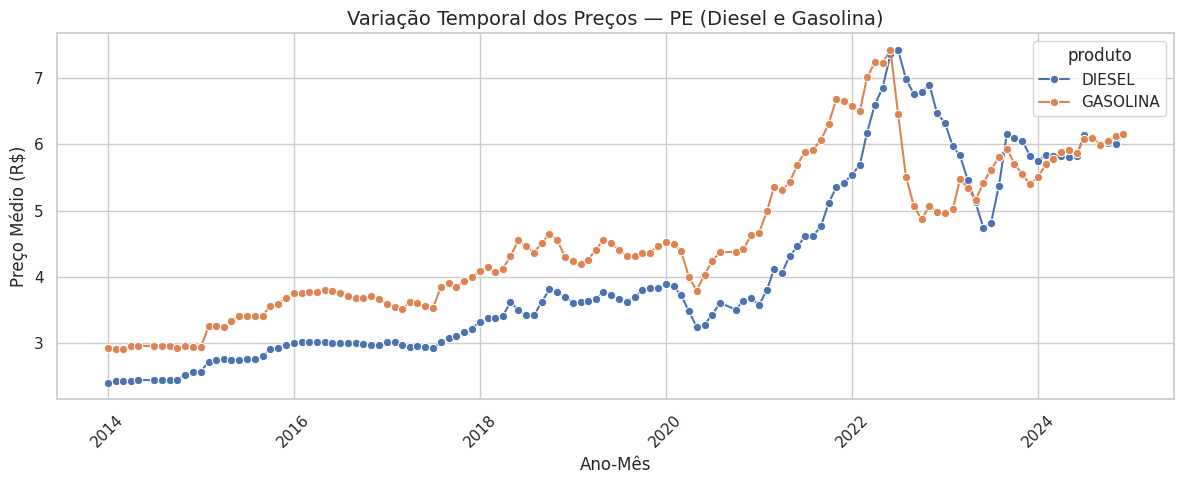

In [29]:
# Agregar média mensal por produto em PE
df_pe_mes = (
    df_combustivel[df_combustivel["estado_sigla"] == "PE"]
    .groupby(["ano", "mes", "produto"])["valor_de_venda"]
    .mean()
    .reset_index()
)

# Criar coluna "ano-mês"
df_pe_mes["ano_mes"] = pd.to_datetime(df_pe_mes["ano"].astype(str) + "-" + df_pe_mes["mes"].astype(str) + "-01")

# Filtrar apenas Diesel e Gasolina
produtos_pe = ["DIESEL", "GASOLINA"]
df_pe_mes = df_pe_mes[df_pe_mes["produto"].isin(produtos_pe)]

# Gráfico de linha ao longo do tempo
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_pe_mes, x="ano_mes", y="valor_de_venda", hue="produto", marker="o")
plt.title("Variação Temporal dos Preços — PE (Diesel e Gasolina)", fontsize=14)
plt.xlabel("Ano-Mês")
plt.ylabel("Preço Médio (R$)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



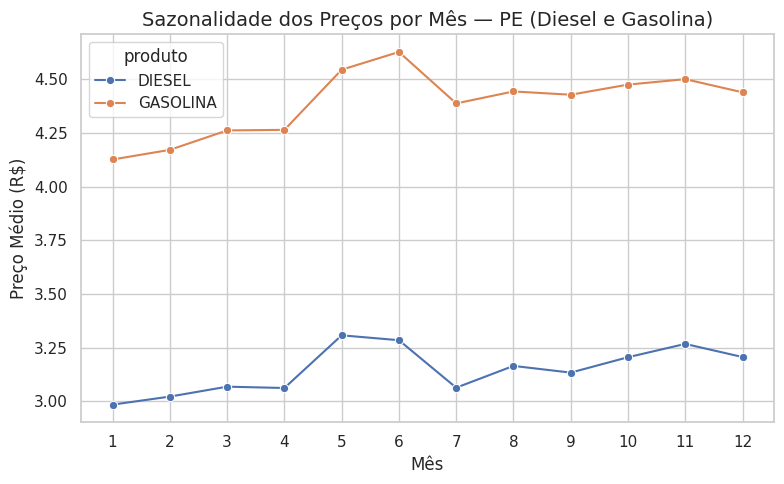

In [32]:
# Agregar média por mês (independente do ano) para PE
df_pe_sazonal = (
    df_combustivel[df_combustivel["estado_sigla"] == "PE"]
    .groupby(["mes", "produto"])["valor_de_venda"]
    .mean()
    .reset_index()
)

# Filtrar apenas Diesel e Gasolina
df_pe_sazonal = df_pe_sazonal[df_pe_sazonal["produto"].isin(produtos_pe)]

# Gráfico de linha para sazonalidade mensal
plt.figure(figsize=(8, 5))
sns.lineplot(data=df_pe_sazonal, x="mes", y="valor_de_venda", hue="produto", marker="o")
plt.title("Sazonalidade dos Preços por Mês — PE (Diesel e Gasolina)", fontsize=14)
plt.xlabel("Mês")
plt.ylabel("Preço Médio (R$)")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()
